<a href="https://colab.research.google.com/github/sikoh/DS-Data-Wrangling-and-Storytelling/blob/main/Make-Explanatory-Visualizations/DS_MakeExplanatoryVisualizations_Lecture_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question
- Student can use Matplotlib to visualize distributions and relationships with continuous and categorical variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



# Common Visualizations

###For categorical variables

Bar
Pie

###For quantitative variables

scatterplots
histograms
box plots

###We will discuss side-by-side bar plots and scatterplots in later projects.

###The Titanic

In the early hours of April 15, 1912, the unsinkable ship RMS Titanic sank
when it struck an iceberg, killing more than half of the passengers and crew aboard. The Titanic.csv dataset contains demographic information for 889 of those passengers
as well as a record of whether or not that each passenger survived.

$\qquad$

Source: Stanford University. 2016. A Titanic Probability. Titanic Training Dataset.
https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [1]:
#Import the Titanic dataset

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv',)\
.rename(columns = {'Sex':"Gender"})\
.drop(columns = ['Siblings/Spouses_Aboard', 'Parents/Children_Aboard'])

Titanic.head()

,Survived,Pclass,Name,Gender,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


###We can make a bar plot to show the frequency of male and female Titanic passengers.

In [2]:
#Calculate frequency of Gender

Titanic['Gender'].value_counts()

male      573
female    314
Name: Gender, dtype: int64

In [10]:
#Relative frequency of Gender
titatic_freq = Titanic['Gender'].value_counts(normalize = True)* 100
titatic_freq

male      64.599775
female    35.400225
Name: Gender, dtype: float64

<BarContainer object of 2 artists>

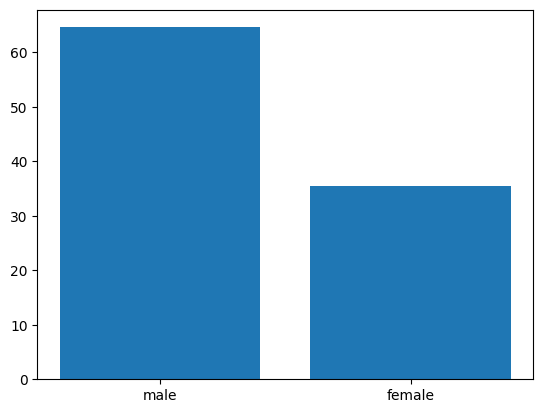

In [12]:
#using matplot library

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(titatic_freq.index,titatic_freq)

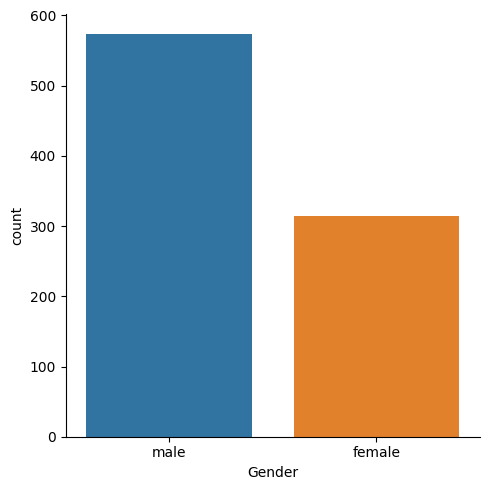

In [18]:
#plot using Seaborn
import seaborn as sns

sns.catplot(x='Gender', data=Titanic, kind='count')

<Axes: title={'center': 'Number of Passengers by Gender on the Titanic'}>

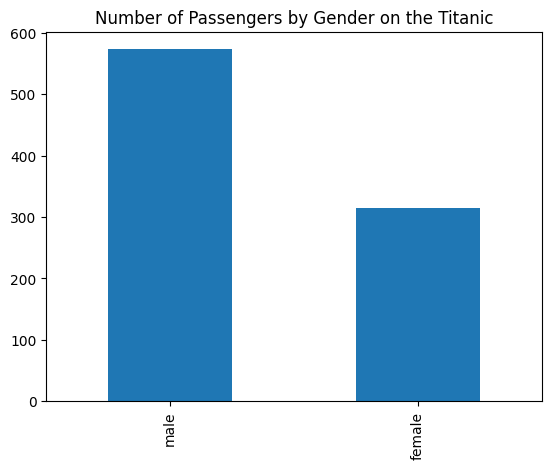

In [19]:
#adding a title
plt.title('Number of Passengers by Gender on the Titanic')
Titanic['Gender'].value_counts().plot(kind='bar')

###Pie Charts.

We'll display the relative frequency of survivors and those who did not survive.


In [20]:
#Find the proportion in each group using normalize=True


Titanic['Survived'].value_counts(normalize=True)* 100

0    61.443067
1    38.556933
Name: Survived, dtype: float64

In [21]:
survived_pct = Titanic['Survived'].value_counts(normalize=True)* 100

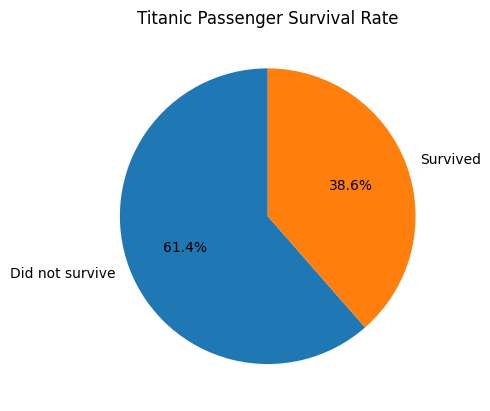

In [30]:
#Create the pie chart

fig, ax = plt.subplots()

#Autopct causes the percents to be rounded.  Startangle causes the starting place
#on the pie chart to be vertical

ax.pie(survived_pct, labels=['Did not survive', 'Survived'], startangle=90, autopct='%1.1f%%')

ax.set_title('Titanic Passenger Survival Rate');

#Displaying and Describing Quantitative Variables

<details>
<summary style="display:list-item">There are two main ways to display the distribution of a single quantitative variable: </summary>
    <ul>Histograms</ul>
    <ul>Box Plots </ul>
</details>

<details>
   <summary style="display:list-item"> The shape of the distribution of a quantitative variable is described with three features: </summary>
    <ul>skew</ul>
    <ul>mode</ul>
    <ul>mean</ul>
</details>




<details>
    <summary style="display:list-item">The most frequent observation in a dataset:</summary>
    Mode
</details>
    
<details>
    <summary style= "display:list-item">One mode is called:</summary>
    Unimodal
</details>
<details>
    <summary style= "display:list-item">Two modes is called:</summary>
    Bimodal
</details>
<details>
    <summary style= "display:list-item">More than two modes is called:</summary>
    Multimodal
</details>
<details>
    <summary style= "display:list-item">No modes is called:</summary>
    Uniform
</details>


<details>
    <summary style= "display:list-item"> A distribution that looks the same on the right and left like pages of a book or halves of a face is called:</summary>
    Symmetric
</details>


<details>
    <summary style= "display:list-item">A distribution where one side looks different than the other:</summary>
    Skewed
</details>

<details>
    <summary style= "display:list-item">If the long tail of the histogram points to the right, the distribution is called</summary>
    Right skewed or having a positive skew.
</details>
<details>
    <summary style= "display:list-item">If the long tail of the distribution points to the left, the distribution is called </summary>
    Left skewed or having a negative skew.
</details>

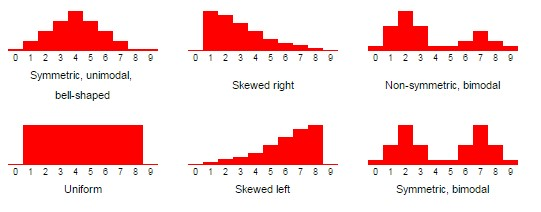

<details>
    <summary style= "display:list-item">Observations that appear very far from the other observations in the distribution are called:</summary>
    Outliers
</details>


<details>
    <summary style= "display:list-item">There are three main reasons that outliers can appear in your data.</summary>
    <ul>Certain statistical distributions are expected to have outliers (Poisson distribution).</ul>
    <ul>Unusual but correct points that contain important information.</ul>
    <ul>Errors. Typos, measurement errors, etc.</ul>
</details>

### Bodytemp

Body temperature measurements for 223 healthy men and women aged 18-40 taken using an electronic digital thermometer. The mean body temperature from multiple measurements over three days was computed for each individual, and this summary measure is recorded in the Bodytemp.csv dataset.

$\qquad$

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M. (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association, 268, 1578-1580.

In [33]:

# Load the Bodytemp dataset from its URL:
temperatures = pd.read_csv('https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Bodytemp/Bodytemp.csv')

temperatures.head()

,ID,Body_temp
0,36,96.7
1,254,96.9
2,282,97.0
3,286,97.0
4,302,97.0


###Sleep

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables
for a selection of mammal species. This data appears in the Sleep.csv dataset.

$\qquad$

Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",
Science, November 12, vol. 194, pp. 732-734.

In [34]:
#Import the Sleep dataset

# Load the Sleep dataset from its URL:
Sleep = pd.read_csv('https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv')

Sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


###Let's look at the distribution of healthy human body temperature.





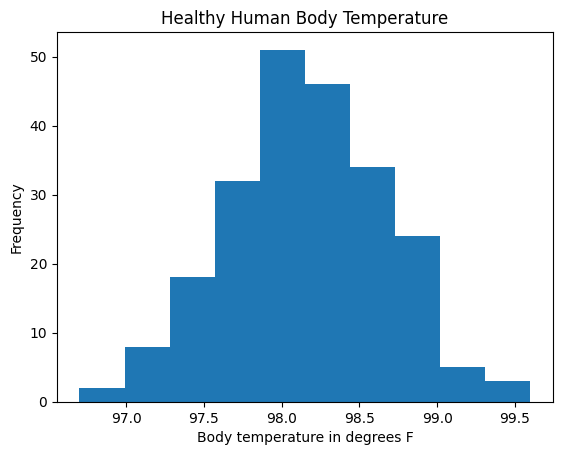

In [37]:
fig, ax = plt.subplots()

ax.hist(temperatures['Body_temp'])

ax.set_xlabel('Body temperature in degrees F')
ax.set_ylabel('Frequency')
ax.set_title('Healthy Human Body Temperature');


<details>
    <summary style= "display:list-item">The distribution for Healthy human body temperature can be considered to be: </summary>
    unimodal and symmetric
</details>

From this, we learn that most healthy individuals have a body temperature around 98ish degrees and few - in equal numbers - have body temperatures a bit higher and lower.

---
<details>
    <summary style= "display:list-item">This type of distribution is also referred to as: </summary>
    Normal or Gaussian Distribution
</details>


Text(0.5, 1.0, 'Healthy Human Body Temperature')

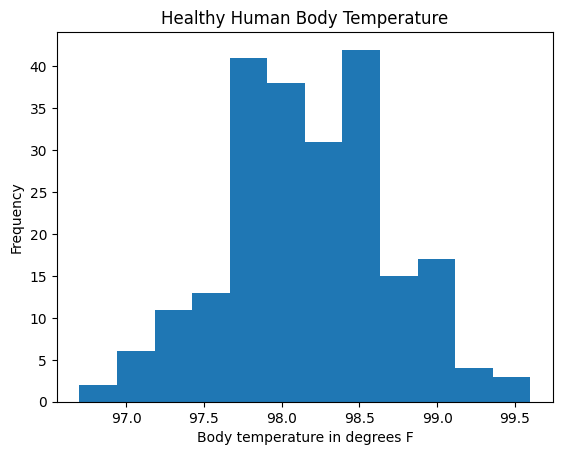

In [39]:
#The default number of bins is 10.  What happens if we change the bin size from 10 to 12 bins?

fig, ax = plt.subplots()

#12 bins instead of 10
ax.hist(temperatures['Body_temp'], bins= 12)

ax.set_xlabel('Body temperature in degrees F')
ax.set_ylabel('Frequency')
ax.set_title('Healthy Human Body Temperature')


Text(0.5, 1.0, 'Healthy Human Body Temperature')

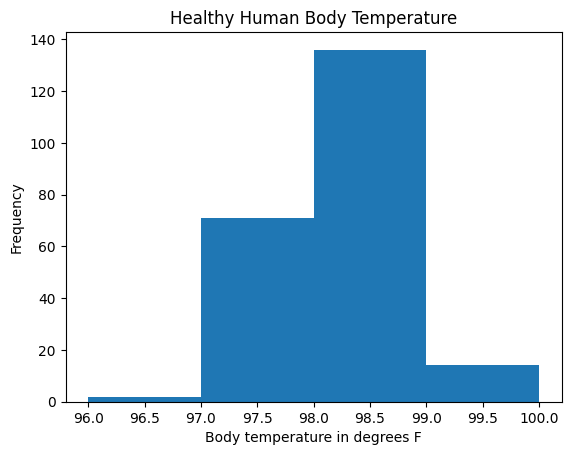

In [41]:
#The default number of bins is 10.  What happens if we specify the exact bin size?

fig, ax = plt.subplots()

#Bins by explicitly stated
ax.hist(temperatures['Body_temp'], bins=[96,97,98,99,100])

ax.set_xlabel('Body temperature in degrees F')
ax.set_ylabel('Frequency')
ax.set_title('Healthy Human Body Temperature')


###Now let's describe the distribution of the age of passengers on the Titanic.



Text(0.5, 1.0, 'Age of Titanic Passengers')

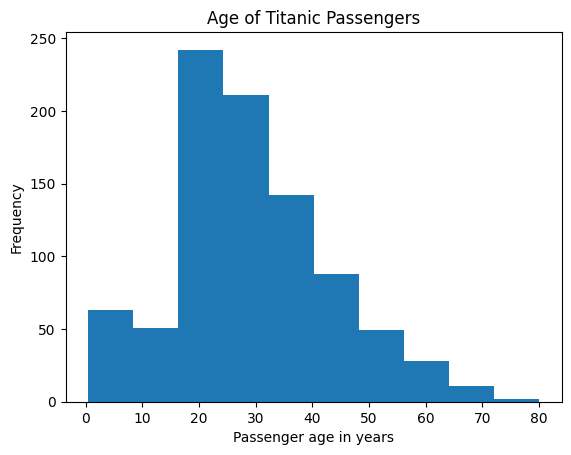

In [42]:
fig, ax = plt.subplots()

ax.hist(Titanic['Age'])

ax.set_xlabel('Passenger age in years')
ax.set_ylabel('Frequency')
ax.set_title('Age of Titanic Passengers')


We can see that most Titanic passengers were in their 20s and 30s with a decreasing number for every older decade.  

<details>
    <summary style= "display:list-item">Type of distribution?</summary>
    Right skewed and unimodal
</details>

###Finally, let's look at the distribution of total sleep in mammal species.

Text(0.5, 1.0, 'Daily sleep in mammal species')

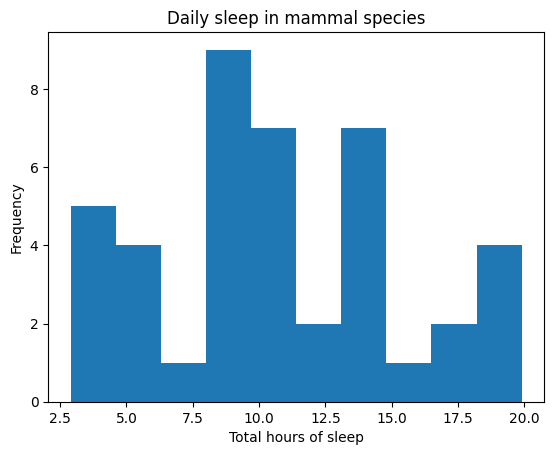

In [43]:
fig, ax = plt.subplots()

ax.hist(Sleep['Totsleep'])

ax.set_xlabel('Total hours of sleep')
ax.set_ylabel('Frequency')
ax.set_title('Daily sleep in mammal species')



<details>
    <summary style= "display:list-item">Type of distribution?</summary>
    Multimodal
</details>

Mammals sleep different amounts of time depending on if they are prey or preditors.

## Box plots

The vertical lines on a box plot divide the data into quarters.  The middle number in the dataset is called the median and is identified by the red vertical bar in the middle of the box (made by Matplotlib).  The vertical lines on the left and right of the box identfy Q1 (the 25th percentile of the data) and Q3 (the 75th) percentile of the data.  The entire middle box shows the range of the middle 50% of the data, called the interquartile range (IQR).

The cool thing about box plots is they identify outliers as circles.  An outlier is defined as any value more than 1.5xIQR below Q1 or 1.5xIQR above Q3.



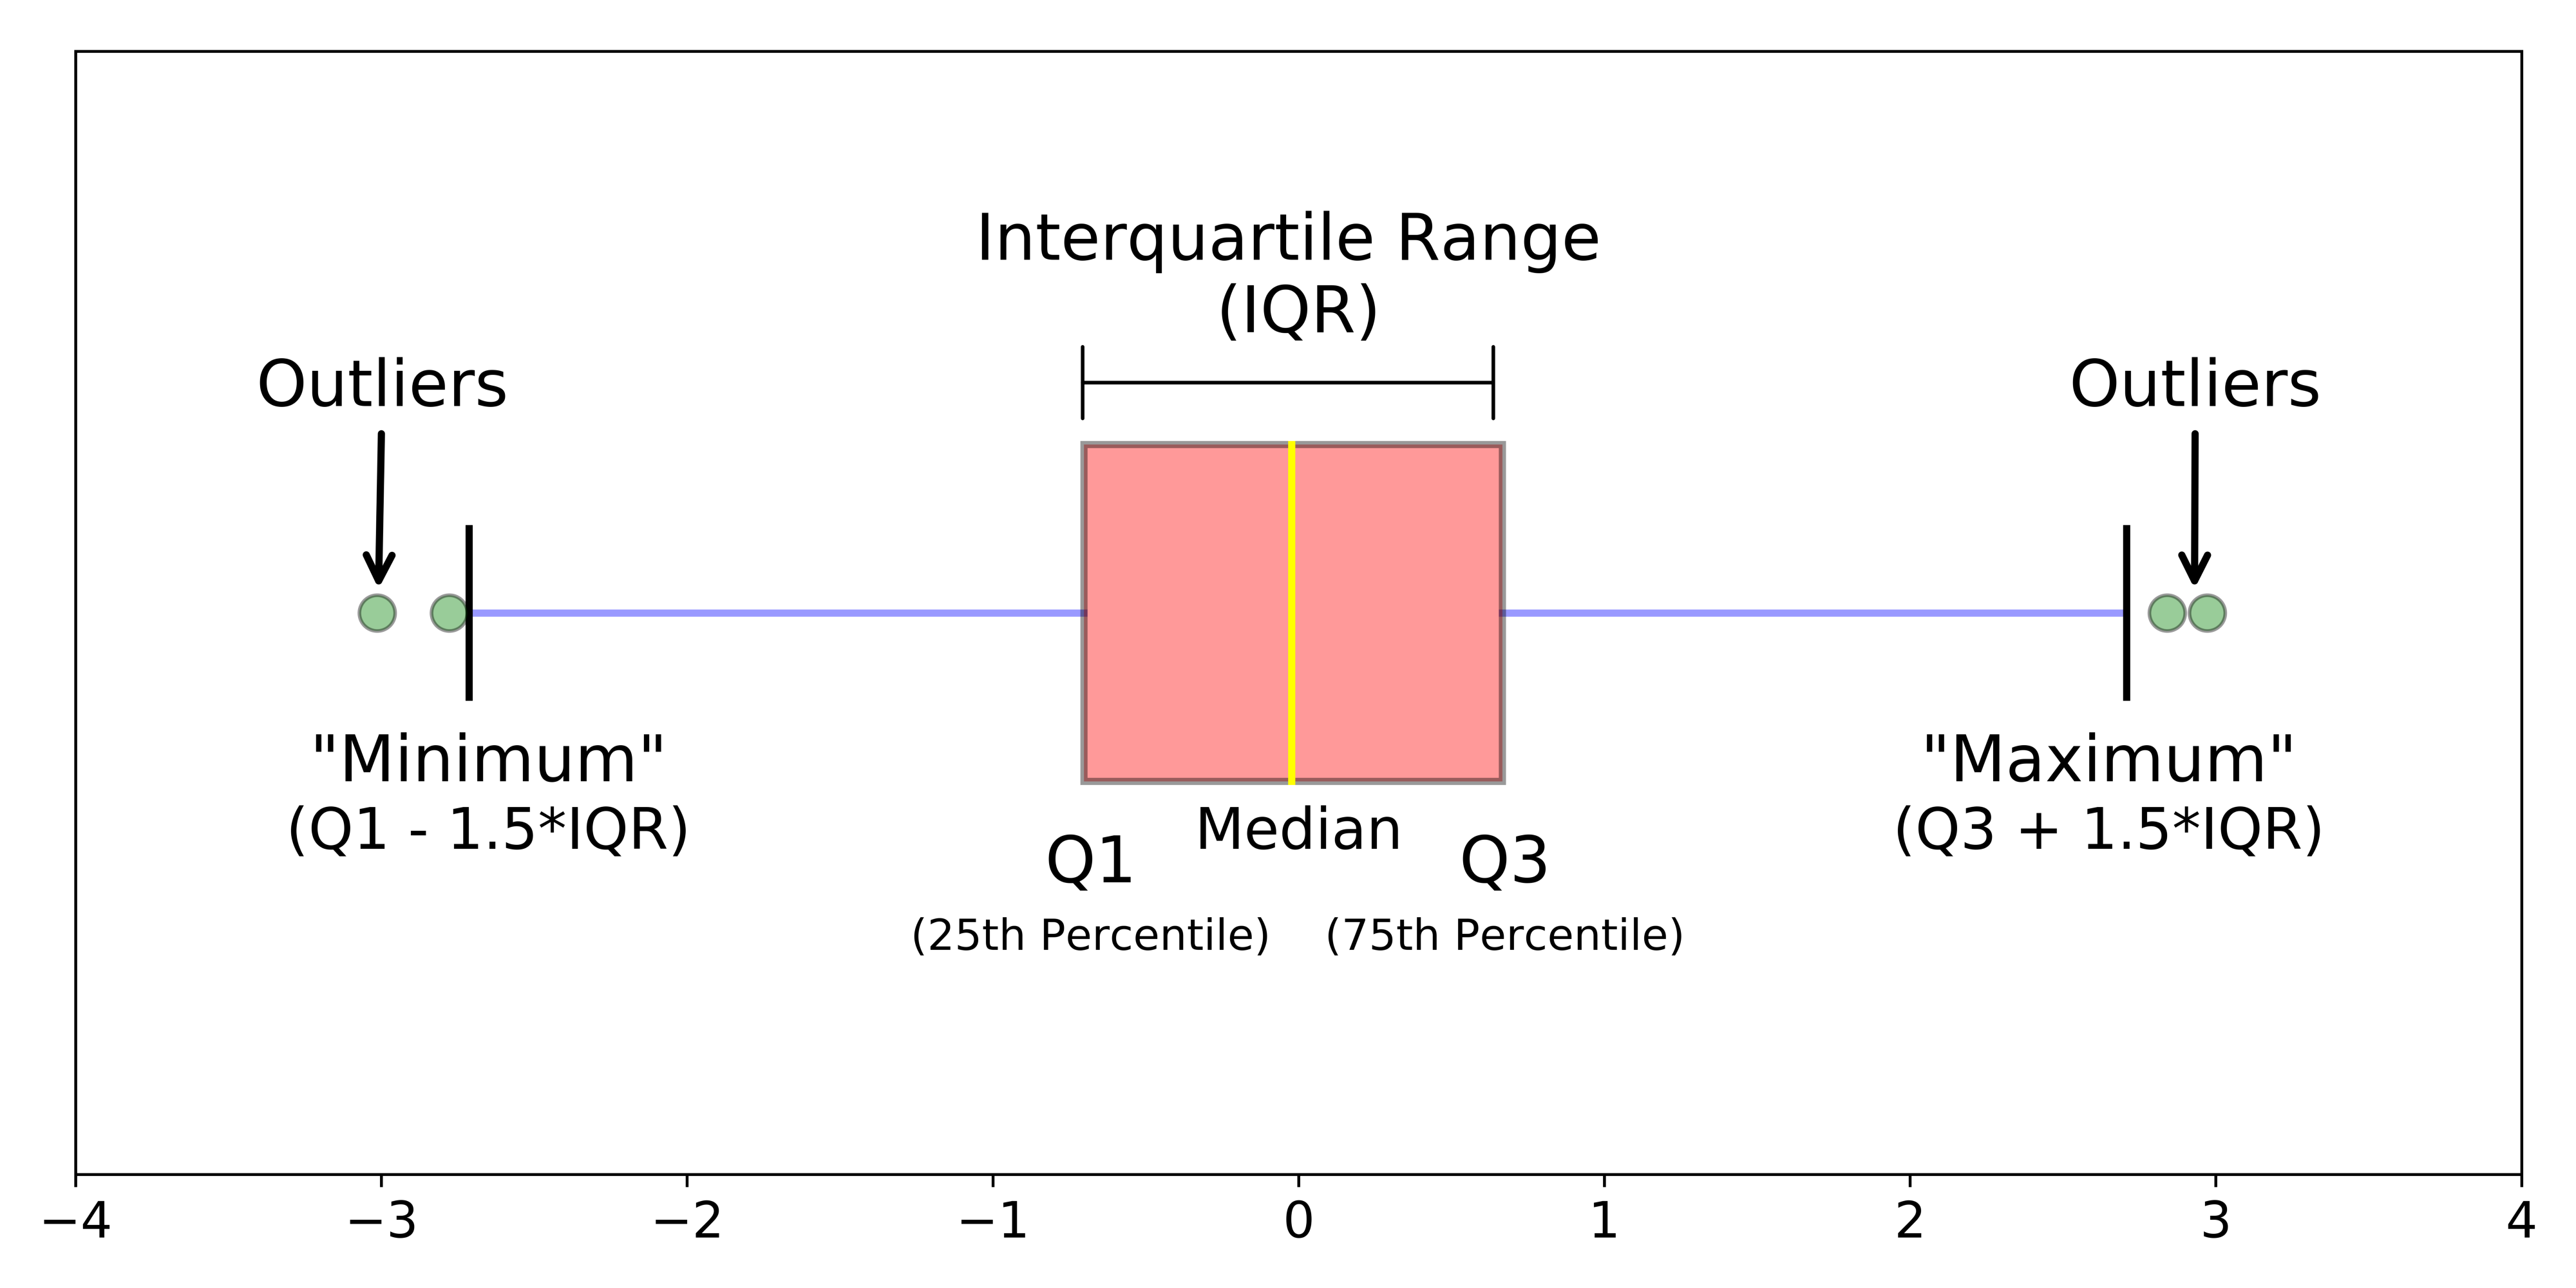

Let's make a box plot displaying healthy human body temperature.

In [47]:
temperatures['Body_temp'].describe()

count    223.000000
mean      98.165022
std        0.527305
min       96.700000
25%       97.800000
50%       98.200000
75%       98.500000
max       99.600000
Name: Body_temp, dtype: float64

Text(0.5, 1.0, 'Distribution of Healthy Human Body Temperature')

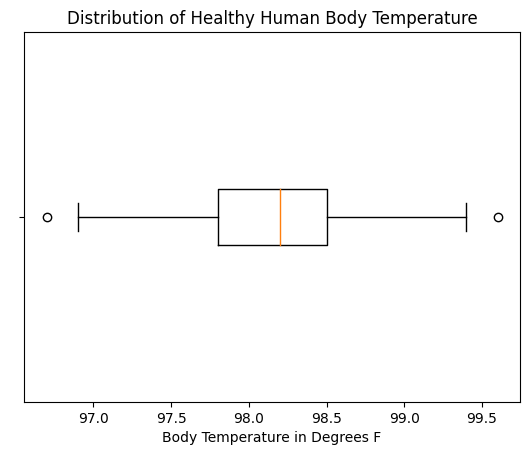

In [46]:
fig, ax = plt.subplots()

ax.boxplot(temperatures['Body_temp'], vert=False)

ax.set_xlabel('Body Temperature in Degrees F')
ax.set_yticklabels(' ')
ax.set_title('Distribution of Healthy Human Body Temperature')


The distribution of healthy human body temperature is pretty symmetric, and there are two outliers - one person with an unusually low body temperature and one with an unusually high temperature.  50% of individuals in the study had a body temperature between about 97.8 and 98.5 degrees F.

Let's compare this to the distribution of age on the Titanic.

Text(0.5, 1.0, 'Distribution of Age on the Titanic')

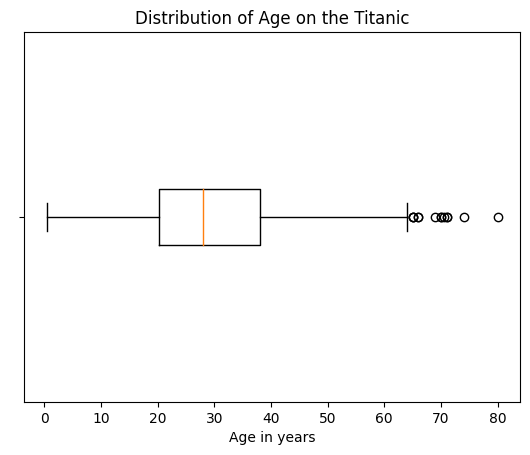

In [48]:
fig, ax = plt.subplots()

ax.boxplot(Titanic['Age'],vert=False)

ax.set_xlabel('Age in years')
ax.set_yticklabels(' ')
ax.set_title('Distribution of Age on the Titanic')


We can see that the distribution of age on the Titanic is skewed to the right because the highest quartile of the data is stretched out to the right.  In particular there are a lot of outliers in the older ages.

Let's look at a box plot of animal sleep.

Text(0.5, 1.0, 'Distribution of Daily Sleep Time in Mammals')

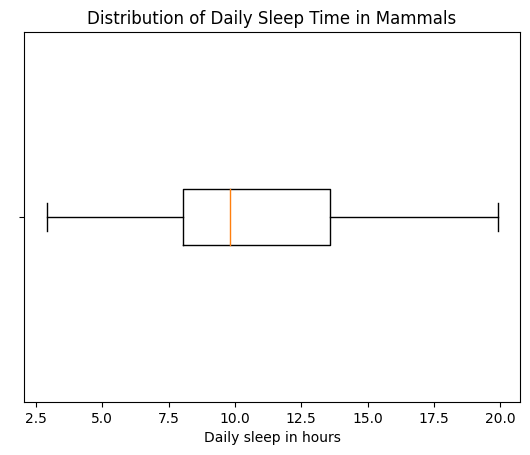

In [52]:
fig, ax = plt.subplots()

ax.boxplot(Sleep['Totsleep'],vert=False)

ax.set_xlabel('Daily sleep in hours')
ax.set_yticklabels(' ')
ax.set_title('Distribution of Daily Sleep Time in Mammals')


Note that the box plot seems a little bit right skewed, but we don't pick up the multiple modes.

Both histograms and box plots are helpful for showing different features of the distribution of a quantitative variable.


<details>
    <summary style= "display:list-item">Histograms show most clearly the number of:</summary>
    modes.
</details>

<details>
    <summary style= "display:list-item">Box plots show most clearly the number of:</summary>
    outliers.
</details>


### We can compare distributions using histograms and box plots as well.

Here we will overlay the age of the Titanic passengers by gender to see if there was a difference in age between male and female passengers.  

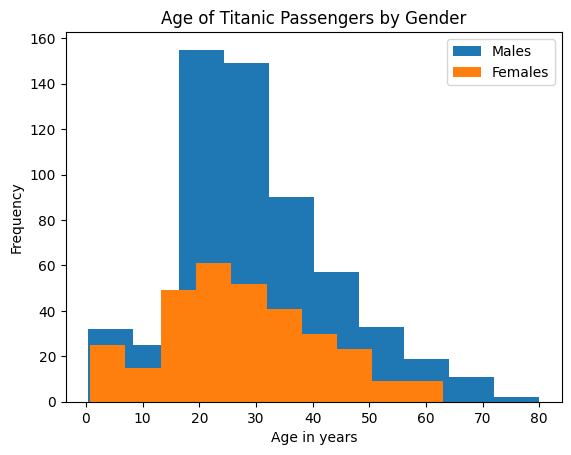

In [55]:

Titanic_Male = Titanic[Titanic['Gender'] == 'male']
Titanic_Female = Titanic[Titanic['Gender'] == 'female']

fig, ax = plt.subplots()

ax.hist(Titanic_Male['Age'], label = 'Males')
ax.hist(Titanic_Female['Age'], label = 'Females')

ax.set_xlabel('Age in years')
ax.set_ylabel('Frequency')
ax.set_title('Age of Titanic Passengers by Gender')

ax.legend()


We can see the same age pattern for male and female passengers, but there were many more male passengers than female passengers.  Let's explore that more.

Text(0.5, 1.0, 'Age of Titanic Passengers')

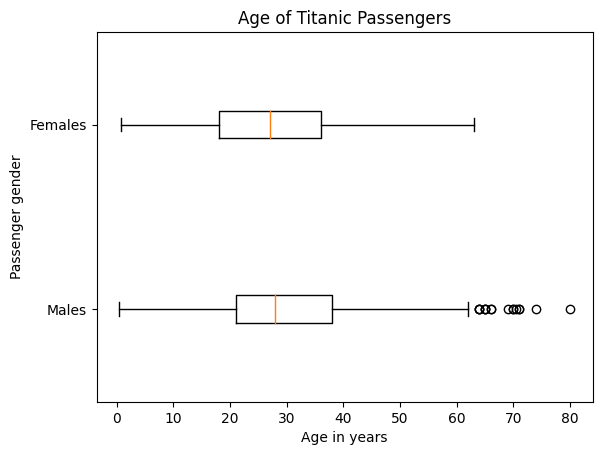

In [57]:
fig, ax = plt.subplots()

ax.boxplot([Titanic_Male['Age'], Titanic_Female['Age']],labels=['Males','Females'],vert=False)

ax.set_xlabel('Age in years')
ax.set_ylabel('Passenger gender')
ax.set_title('Age of Titanic Passengers')


We can see clearly here that there weren't really any female passengers who were older than 60; however, there were quite a few male passengers who were that old.

<Axes: xlabel='Age', ylabel='Gender'>

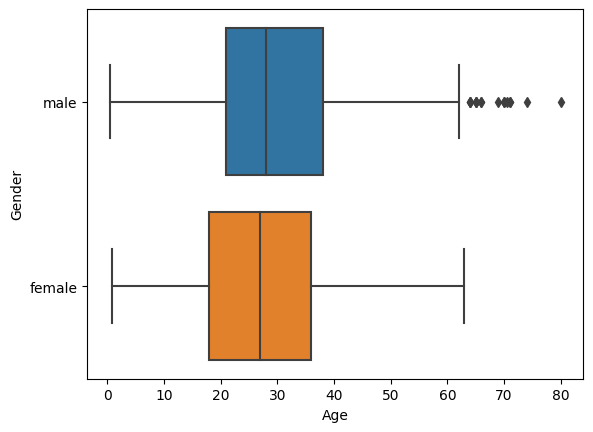

In [61]:
sns.boxplot(x='Age', y='Gender', data = Titanic)

# The Normal Distribution

The reason that we are so interested in the shape of the distribution of a quantitative variable is that variables that are Normally distributed (unimodal and symmetric) have very special mathematical properties that will be helpful to us in the future.

In particular, when a variable has a Normal distribution (or follows a Normal model), the mean is a good descriptor of a "typical" value of that variable.  This is not true for other distributions.

For distributions that are not unimodal and symmetric, the median is a better measure of a "typical" value.

When the data is very skewed, the mean is not a good measure of center or of a "typical" value.

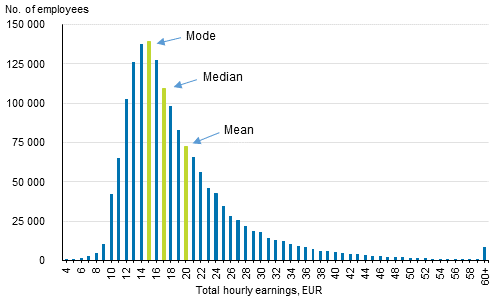

In contrast, with a Normal distribution, the mean is equal to the median and the mode.

Further, there are mathematical rules that govern the shape of a Normal distribution.

In particular, the 68-95-99.7% rule (also known as the empirical rule) tells us how many values we expect to be with +/- 1, 2 and 3 standard deviations of the mean.

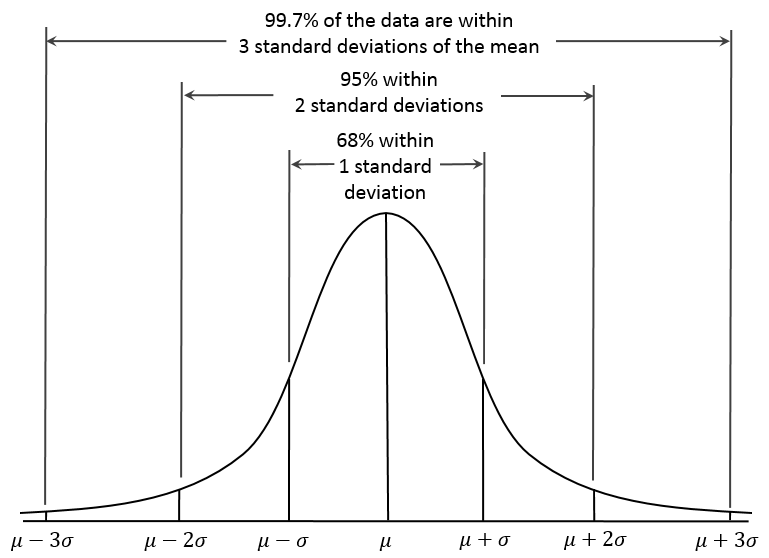

###What is a standard deviation?

**Standard deviation** is a measure of how far each individual observation in a dataset is from the mean.



<details>
    <summary style= "display:list-item">Large SD = </summary>
    Points spread out from the mean.
</details>
<details>
    <summary style= "display:list-item">Small SD = </summary>
    Points close to the mean.
</details>However, because the SD depends on the units being measured, you can't *really* compare the SD between different distributions.


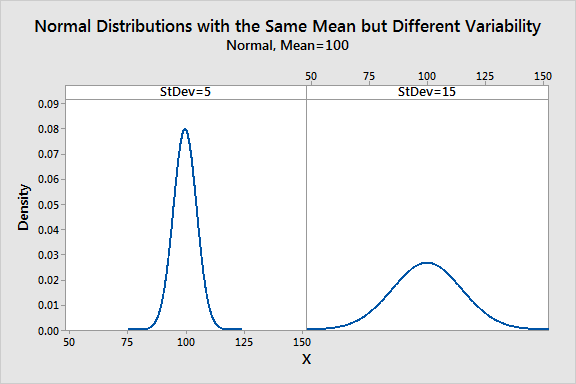

We calculate the mean of a dataset by adding up all of the observations and dividing by the number of observations.

In [62]:
#Calculate the mean
temperatures['Body_temp'].mean()

98.16502242152464

<Axes: ylabel='Frequency'>

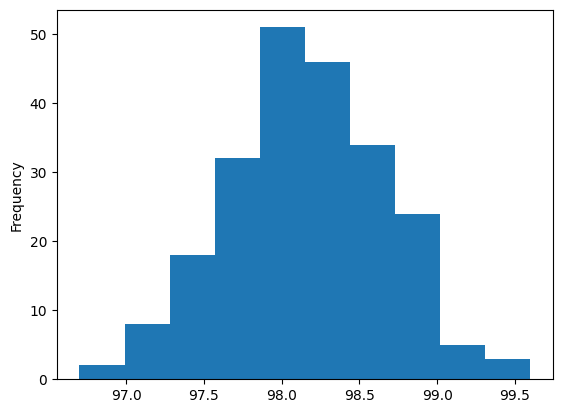

In [63]:
temperatures['Body_temp'].plot(kind='hist')

In [66]:
#Print the first 5 rows

temperatures.head()

,ID,Body_temp
0,36,96.7
1,254,96.9
2,282,97.0
3,286,97.0
4,302,97.0


The deviations in the dataset are each observation - the mean

*   96.7 - 98.16 = - 1.46
*   96.9 - 98.16 = - 1.26
*   97.0 - 98.16 = - 1.16
*   97.0 - 98.16 = - 1.16

etc.

To calculate the SD, we add the squared deviations, divide by n - 1, and take the square root.

Or let Python do the work for us.

In [67]:
#Calculate the SD
temperatures['Body_temp'].std()

0.5273047859946359

We say that healthy human body temperature seems to have a Normal distribution (or fit a Normal model) with a mean of 98.16 degrees F and a standard deviation of 0.53 degrees F.

Remember, another cool thing about the Normal distribution is that we can say we expect 99.7% of observations to fall within +/- 3 SDs of the mean.

In [75]:
#Calculate the lower and upper end of +/- 3SDs
lower = temperatures['Body_temp'].mean() - temperatures['Body_temp'].std() * 3
upper = temperatures['Body_temp'].mean() + temperatures['Body_temp'].std() * 3
print(lower, upper)

96.58310806354073 99.74693677950854


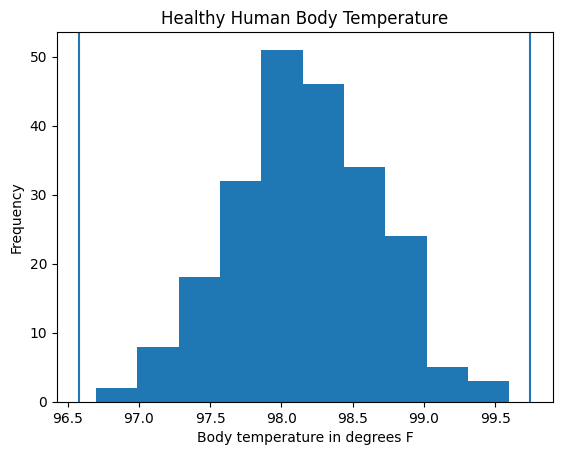

In [77]:
#Look at histogram

fig, ax = plt.subplots()

ax.hist(temperatures['Body_temp'])

ax.set_xlabel('Body temperature in degrees F')
ax.set_ylabel('Frequency')
ax.set_title('Healthy Human Body Temperature')
ax.axvline(lower)
ax.axvline(upper)


#Do not take this fact for granted!  It does not apply to data with other distributions!

In addition to being able to say that 99.7% of the observations in a Normal model fall between +/-3 SDs of the mean, we can actually determine what proportion of the data we expect to fall above or below any value.

# Avoid Misleading Visualizations

Now that we've made a few good graphs, [let's talk about some bad ones](https://colab.research.google.com/drive/1rrwiqEC1Ern8KUrVM6RmU1FpAB1Lfdh-?usp=sharing).

#### Clear Stories

In [78]:
#data from NOAA and Kaggle
#https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temp = pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module4-make-explanatory-visualizations/data/globaltemps.csv')
temp.drop(['Unnamed: 0', 'year'], axis = 1, inplace = True)
temp.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


<Axes: >

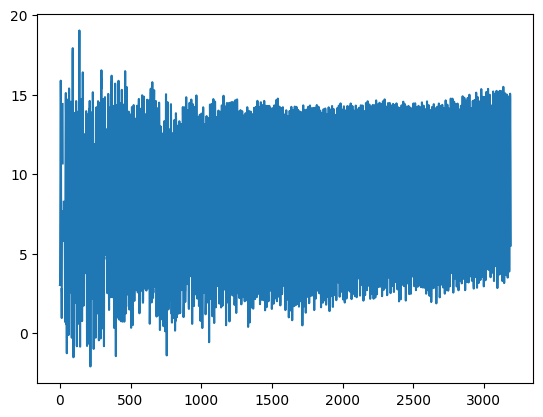

In [79]:
temp['LandAverageTemperature'].plot()

In [81]:
temp.dtypes

dt                         object
LandAverageTemperature    float64
dtype: object

In [82]:
pd.to_datetime(temp['dt'])

0      1750-01-01
1      1750-02-01
2      1750-03-01
3      1750-04-01
4      1750-05-01
          ...    
3187   2015-08-01
3188   2015-09-01
3189   2015-10-01
3190   2015-11-01
3191   2015-12-01
Name: dt, Length: 3192, dtype: datetime64[ns]

In [83]:
temp['dt']= pd.to_datetime(temp['dt'])

In [84]:
temp['year'] = temp['dt'].dt.year
temp

,dt,LandAverageTemperature,year
0,1750-01-01,3.034,1750
1,1750-02-01,3.083,1750
2,1750-03-01,5.626,1750
3,1750-04-01,8.490,1750
4,1750-05-01,11.573,1750
...,...,...,...
3187,2015-08-01,14.755,2015
3188,2015-09-01,12.999,2015
3189,2015-10-01,10.801,2015
3190,2015-11-01,7.433,2015


<Axes: xlabel='year'>

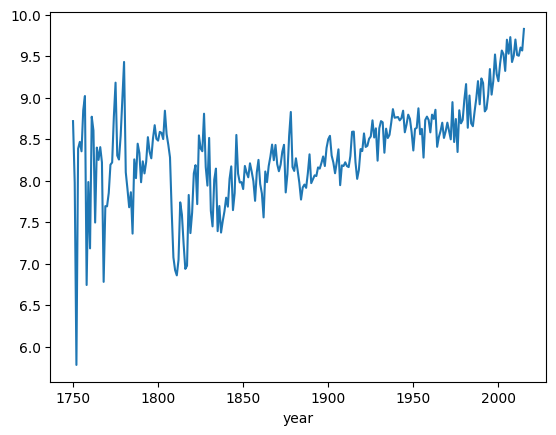

In [86]:
temp.groupby('year')['LandAverageTemperature'].mean().plot()

### More Libraries

#### Plotly

In [87]:
#pip install plotly

In [88]:
import plotly.express as px

In [89]:
px.histogram(data_frame= Titanic, x = 'Age')

In [91]:
px.scatter_3d(data_frame= Sleep, x = 'Danger', y = 'Life', z = 'Totsleep')